In [5]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.patches as mpatches
from scipy.io import savemat, loadmat
from scipy.stats import median_abs_deviation
import os

import sys
plotDir = 'colormaps'
try: 
    os.mkdir(plotDir)
except FileExistsError:
    pass
from help_funcs import *

import matplotlib

matplotlib.rcParams.update({'font.size': 18})

plotDataDir = 'compiled_data'
try: 
    os.mkdir(plotDataDir)
except FileExistsError:
    pass


sstcolor = (0.898,0.6314,0.0039)
pvcolor = (0.0, 0.4039, 0.7059)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import seaborn as sns

In [2]:
def get_slope(m,C,n,k):
    cvals = np.arange(0.02,0.33,0.01)
    yvals = naka_rushton(cvals, m, C, n, k)
    
    slopes = []
    for i in range(1, len(cvals)):
        slopes.append((yvals[i]-yvals[i-1])/0.01)
    maxslope = np.max(slopes)
    return maxslope, cvals[slopes.index(maxslope)]

In [3]:
contrasts = np.array([0.02, 0.05, 0.1, 0.18, 0.33])
ignor=1
numseeds = 10
di=0
delay = 200
binlen = 200
pi=0

dist='local'
distToPrint='0mm'

alpha_list = [0.04,0.05,0.06,0.07,0.08]
pfar_list = [0.2,0.5,0.8]
alpha_list_to_save = [int(x*10**3) for x in alpha_list]
cmap = {}
cmap['dend_inh_strengths'] = alpha_list_to_save
print(alpha_list_to_save)

PV_MI_medians = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_medians = np.zeros((len(alpha_list),len(pfar_list)))
PV_MI_sds = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_sds = np.zeros((len(alpha_list),len(pfar_list)))
PV_MI_mads = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_mads = np.zeros((len(alpha_list),len(pfar_list)))


for ai in range(len(alpha_list)):
    alpha = alpha_list[ai]
    print(f'alpha = {alpha}')
    for pfi in range(len(pfar_list)):
        pfar = pfar_list[pfi]
        
        rawDataPath = plotDataDir + f'/{dist}_a%s'%alpha + '_pf%s'%pfar
        
        try: 
            os.mkdir(rawDataPath)
        except FileExistsError:
            pass
        
        print(f'\tpfar = {pfar}')
        simname = 't90_a%s'%alpha + '_pf%s'%pfar
#         print(simname)
        all_conditions = []
        slopes_cp, slopes_sp, slopes_cs, slopes_ss = [], [], [], []


        ctrl_pv_ave = np.zeros(5)
        stim_pv_ave = np.zeros(5)
        ctrl_sst_ave = np.zeros(5)
        stim_sst_ave = np.zeros(5)

        for seed in range(1,numseeds+1):
            print(f'\t\tseed {seed}')
            ctrl_pv_curve = [[] for i in range(4)]
            stim_pv_curve = [[] for i in range(4)]
            ctrl_sst_curve = [[] for i in range(4)]
            stim_sst_curve = [[] for i in range(4)]

            ctrl_pv_curve_e = [[] for i in range(4)]
            stim_pv_curve_e = [[] for i in range(4)]
            ctrl_sst_curve_e = [[] for i in range(4)]
            stim_sst_curve_e = [[] for i in range(4)]


            folder = f'{dist}_data/%s/results_%s/'%(simname, seed)
#             print(f'folder = {folder}')
            not_all_found=False
            for cont in contrasts:
                try:
                    with open(folder + 'PV_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'PV_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    print(simname, seed, 'PV', cont, 'not found.')
                    not_all_found = True
                    break

                ctrlpv_E_mean, stimpv_E_mean, ctrlpv_E_err, stimpv_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay,binlen=binlen)
                ctrlpv_P_mean, stimpv_P_mean, ctrlpv_P_err, stimpv_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen=binlen)
                ctrlpv_S_mean, stimpv_S_mean, ctrlpv_S_err, stimpv_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen=binlen)
                ctrlpv_A_mean, stimpv_A_mean, ctrlpv_A_err, stimpv_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen=binlen)

                ctrl_pv_curve[0].append(ctrlpv_E_mean)
                ctrl_pv_curve[1].append(ctrlpv_P_mean)
                ctrl_pv_curve[2].append(ctrlpv_S_mean)
                ctrl_pv_curve[3].append(ctrlpv_A_mean)
                ctrl_pv_curve_e[0].append(ctrlpv_E_err)
                ctrl_pv_curve_e[1].append(ctrlpv_P_err)
                ctrl_pv_curve_e[2].append(ctrlpv_S_err)
                ctrl_pv_curve_e[3].append(ctrlpv_A_err)

                stim_pv_curve[0].append(stimpv_E_mean)
                stim_pv_curve[1].append(stimpv_P_mean)
                stim_pv_curve[2].append(stimpv_S_mean)
                stim_pv_curve[3].append(stimpv_A_mean)
                stim_pv_curve_e[0].append(stimpv_E_err)
                stim_pv_curve_e[1].append(stimpv_P_err)
                stim_pv_curve_e[2].append(stimpv_S_err)
                stim_pv_curve_e[3].append(stimpv_A_err)


                try:
                    with open(folder + 'SST_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'SST_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    print(simname, seed, 'SST', cont, 'not found.')
                    not_all_found = True
                    break

                ctrlsst_E_mean, stimsst_E_mean, ctrlsst_E_err, stimsst_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay, binlen= binlen)
                ctrlsst_P_mean, stimsst_P_mean, ctrlsst_P_err, stimsst_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen= binlen)
                ctrlsst_S_mean, stimsst_S_mean, ctrlsst_S_err, stimsst_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen= binlen)
                ctrlsst_A_mean, stimsst_A_mean, ctrlsst_A_err, stimsst_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen= binlen)


                ctrl_sst_curve[0].append(ctrlsst_E_mean)
                ctrl_sst_curve[1].append(ctrlsst_P_mean)
                ctrl_sst_curve[2].append(ctrlsst_S_mean)
                ctrl_sst_curve[3].append(ctrlsst_A_mean)
                ctrl_sst_curve_e[0].append(ctrlsst_E_err)
                ctrl_sst_curve_e[1].append(ctrlsst_P_err)
                ctrl_sst_curve_e[2].append(ctrlsst_S_err)
                ctrl_sst_curve_e[3].append(ctrlsst_A_err)

                stim_sst_curve[0].append(stimsst_E_mean)
                stim_sst_curve[1].append(stimsst_P_mean)
                stim_sst_curve[2].append(stimsst_S_mean)
                stim_sst_curve[3].append(stimsst_A_mean)
                stim_sst_curve_e[0].append(stimsst_E_err)
                stim_sst_curve_e[1].append(stimsst_P_err)
                stim_sst_curve_e[2].append(stimsst_S_err)
                stim_sst_curve_e[3].append(stimsst_A_err)
            # contrasts = np.array([ 0.05, 0.1, 0.2, 0.3])


                ctrl_pv_ave += ctrlpv_A_mean
                stim_pv_ave += stimpv_A_mean
                ctrl_sst_ave += ctrlsst_A_mean
                stim_sst_ave += stimsst_A_mean

            if not_all_found:
                continue



            params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_pv_curve[pi][ignor:], sigma=ctrl_pv_curve_e[pi][ignor:])
            m_cp, C_cp, n_cp, k_cp = params
            m_cp_err, C_cp_err, n_cp_err, k_cp_err = np.sqrt(np.diag(cov))
        #     slope_cp = C_cp*n_cp/k_cp/4.0
            slope_cp, _ = get_slope(m_cp, C_cp, n_cp, k_cp)
            
            condpv = True in (x == 0 for x in stim_pv_curve_e[pi][ignor:])
            condsst = True in (x == 0 for x in stim_sst_curve_e[pi][ignor:]) 

            if stim_pv_curve[pi][ignor:] == [0,0,0,0] or condpv:
                slope_sp = 0
            else:
                params, cov = fit_naka_rushton(contrasts[ignor:], stim_pv_curve[pi][ignor:], sigma=stim_pv_curve_e[pi][ignor:])
                m_sp, C_sp, n_sp, k_sp = params
                m_sp_err, C_sp_err, n_sp_err, k_sp_err = np.sqrt(np.diag(cov))
            #     slope_sp = C_sp*n_sp/k_sp/4.0
                slope_sp, _ = get_slope(m_sp, C_sp, n_sp, k_sp)
                
            

            params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_sst_curve[pi][ignor:], sigma=ctrl_sst_curve_e[pi][ignor:])
            m_cs, C_cs, n_cs, k_cs = params
            m_cs_err, C_cs_err, n_cs_err, k_cs_err = np.sqrt(np.diag(cov))
        #     slope_cs = C_cs*n_cs/k_cs/4.0
            slope_cs, _ = get_slope(m_cs, C_cs, n_cs, k_cs)

            if stim_sst_curve[pi][ignor:] == [0,0,0,0] or condsst:
                slope_ss = 0
            else:
#                 print(f'stim_sst_curve = {stim_sst_curve[pi][ignor:]}')
#                 print(f'stim_sst_curve_e = {stim_sst_curve_e[pi][ignor:]}')
                params, cov = fit_naka_rushton(contrasts[ignor:], stim_sst_curve[pi][ignor:], sigma=stim_sst_curve_e[pi][ignor:])
                m_ss, C_ss, n_ss, k_ss = params
                m_ss_err, C_ss_err, n_ss_err, k_ss_err = np.sqrt(np.diag(cov))
            #     slope_ss = C_ss*n_ss/k_ss/4.0
                slope_ss, _ = get_slope(m_ss, C_ss, n_ss, k_ss)


        #     if np.max( [slope_cp, slope_sp, slope_cs, slope_ss] ) >50: continue
            slopes_cp.append(slope_cp)
            slopes_sp.append(slope_sp)
            slopes_cs.append(slope_cs)
            slopes_ss.append(slope_ss)

        ctrl_pv_ave = ctrl_pv_ave/100.
        stim_pv_ave = stim_pv_ave/100.
        ctrl_sst_ave = ctrl_sst_ave/100.
        stim_sst_ave = stim_sst_ave/100.

        all_slopes = [slopes_cp, slopes_sp, slopes_cs, slopes_ss]


        all_conditions.append(all_slopes)
        
        di =0

        slopes_cp, slopes_sp, slopes_cs, slopes_ss = all_conditions[di]

        PV_changes = []
        for ii in range(len(slopes_cp)):
            PV_changes.append( (slopes_sp[ii]-slopes_cp[ii]) / (slopes_sp[ii]+slopes_cp[ii]) )

        SST_changes = []
        for ii in range(len(slopes_cs)):
            SST_changes.append( (slopes_ss[ii]-slopes_cs[ii]) / (slopes_ss[ii]+slopes_cs[ii])  )

        PV_median = np.median(PV_changes)
        SST_median = np.median(SST_changes)
        PV_sd = np.std(PV_changes)
        SST_sd = np.std(SST_changes)
        PV_mad = median_abs_deviation(PV_changes)
        SST_mad = median_abs_deviation(SST_changes)
        
        PV_MI_medians[ai][pfi] = PV_median
        SST_MI_medians[ai][pfi] = SST_median
        PV_MI_sds[ai][pfi] = PV_sd
        SST_MI_sds[ai][pfi] = SST_sd
        PV_MI_mads[ai][pfi] = PV_mad
        SST_MI_mads[ai][pfi] = SST_mad
        
        
        # np.save(rawDataPath + 'PV_changes.npy', PV_changes)
        # np.save(rawDataPath + 'SST_changes.npy', SST_changes)
        
cmap['PV_MI_medians'] = PV_MI_medians
cmap['SST_MI_medians'] = SST_MI_medians
cmap['PV_MI_mads'] = PV_MI_mads
cmap['SST_MI_mads'] = SST_MI_mads
savemat(f"{distToPrint}_cmaps.mat",cmap)

# np.save(plotDataDir + f'/PV_MI_medians_{dist}_{numseeds}seeds.npy', PV_MI_medians)
# np.save(plotDataDir + f'/SST_MI_medians_{dist}_{numseeds}seeds.npy', SST_MI_medians)
# np.save(plotDataDir + f'/PV_MI_sds_{dist}_{numseeds}seeds.npy', PV_MI_sds)
# np.save(plotDataDir + f'/SST_MI_sds_{dist}_{numseeds}seeds.npy', SST_MI_sds)
# np.save(plotDataDir + f'/PV_MI_mads_{dist}_{numseeds}seeds.npy', PV_MI_mads)
# np.save(plotDataDir + f'/SST_MI_mads_{dist}_{numseeds}seeds.npy', SST_MI_mads)

[40, 50, 60, 70, 80]
alpha = 0.04
	pfar = 0.2
		seed 1


/storage/home/hcoda1/8/zmobille3/.conda/envs/trainsnn/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.5
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.8
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
alpha = 0.05
	pfar = 0.2
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.5
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.8
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
alpha = 0.06
	pfar = 0.2
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.5
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.8
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
alpha = 0.07
	pfar = 0.2
		seed 1
		seed 2
		seed 3
		seed 4
		seed 

In [11]:

mat_fname = f"{distToPrint}_cmaps.mat"
mat_contents = loadmat(mat_fname)
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sat Oct 19 20:25:40 2024',
 '__version__': '1.0',
 '__globals__': [],
 'dend_inh_strengths': array([[40, 50, 60, 70, 80]]),
 'PV_MI_medians': array([[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]]),
 'SST_MI_medians': array([[-0.98558799, -0.95688376, -0.86048207],
        [-0.98583527, -0.97593177, -0.89923622],
        [-0.99437842, -0.98676014, -0.93397452],
        [-1.        , -0.9934249 , -0.95730999],
        [-1.        , -0.99746248, -0.9659695 ]]),
 'PV_MI_mads': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 'SST_MI_mads': array([[0.00693747, 0.02120086, 0.04085972],
        [0.01016687, 0.01194474, 0.02664949],
        [0.00321985, 0.00424688, 0.02357001],
        [0.        , 0.00521931, 0.00871893],
        [0.        , 0.00253752, 0.00881824]])}

/scratch/1706985/ipykernel_226730/2785025926.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


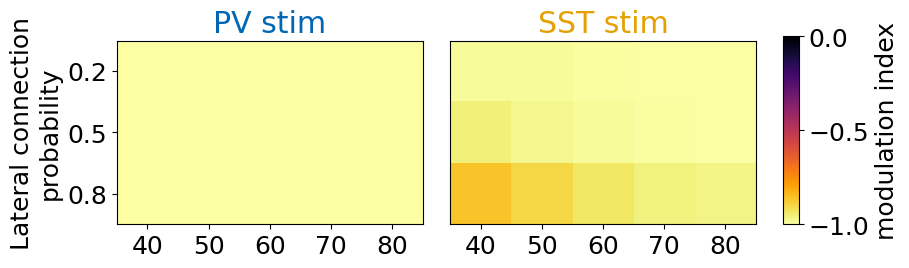

In [12]:
## USE ##

alpha_list = [0.04,0.05,0.06,0.07,0.08]
pfar_list = [0.2,0.5,0.8]

mat_fname = plotDataDir + f"/{distToPrint}_cmaps.mat"
mat_contents = loadmat(mat_fname)

PV_MI_medians = mat_contents['PV_MI_medians']
SST_MI_medians = mat_contents['SST_MI_medians']

gridspec = {'width_ratios': [1, 1]}

fig, ax = plt.subplots(1,2, figsize=(8,4), gridspec_kw=gridspec)

ax[0].imshow(PV_MI_medians.T, cmap='inferno_r', vmin=-1, vmax=0)
im = ax[1].imshow(SST_MI_medians.T, cmap='inferno_r', vmin=-1, vmax=0)

tic = ['%.0f'%(alpha*(10**3)) for alpha in alpha_list]

ax[0].set_yticks([0,1,2],pfar_list)
ax[1].set_title('SST stim', color=sstcolor)
ax[0].set_title('PV stim', color=pvcolor)
ax[1].set_yticks([])
ax[0].set_ylabel('Lateral connection\nprobability')
ax[0].set_xticks([0,1,2,3,4],tic)
# plt.sca(ax[1])
ax[1].set_xticks([0,1,2,3,4],tic)

cb_ax = fig.add_axes([1., 0.27, 0.02, 0.47])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('modulation index')

plt.tight_layout()
plt.savefig(plotDir + f'/Fig_S12A.png',bbox_inches='tight',dpi=200)
plt.show()

In [14]:
## USE ##

contrasts = np.array([0.02, 0.05, 0.1, 0.18, 0.33])
ignor=1
numseeds = 10
di=0
delay = 200
binlen = 200
pi=0

dist='0p25'
distToPrint='0.35mm'

alpha_list = [0.04,0.05,0.06,0.07,0.08]
pfar_list = [0.2,0.5,0.8]
alpha_list_to_save = [int(x*10**3) for x in alpha_list]
cmap = {}
cmap['dend_inh_strengths'] = alpha_list_to_save
print(alpha_list_to_save)

PV_MI_medians = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_medians = np.zeros((len(alpha_list),len(pfar_list)))
PV_MI_sds = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_sds = np.zeros((len(alpha_list),len(pfar_list)))
PV_MI_mads = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_mads = np.zeros((len(alpha_list),len(pfar_list)))


for ai in range(len(alpha_list)):
    alpha = alpha_list[ai]
    print(f'alpha = {alpha}')
    for pfi in range(len(pfar_list)):
        pfar = pfar_list[pfi]
        
        rawDataPath = plotDataDir + f'/{dist}_a%s'%alpha + '_pf%s'%pfar
#         print(rawDataPath)
        
        try: 
            os.mkdir(rawDataPath)
        except FileExistsError:
            pass
        
        print(f'\tpfar = {pfar}')
        simname = 't90_a%s'%alpha + '_pf%s'%pfar
#         print(simname)
        all_conditions = []
        slopes_cp, slopes_sp, slopes_cs, slopes_ss = [], [], [], []


        ctrl_pv_ave = np.zeros(5)
        stim_pv_ave = np.zeros(5)
        ctrl_sst_ave = np.zeros(5)
        stim_sst_ave = np.zeros(5)

        for seed in range(1,numseeds+1):
            print(f'\t\tseed {seed}')
            ctrl_pv_curve = [[] for i in range(4)]
            stim_pv_curve = [[] for i in range(4)]
            ctrl_sst_curve = [[] for i in range(4)]
            stim_sst_curve = [[] for i in range(4)]

            ctrl_pv_curve_e = [[] for i in range(4)]
            stim_pv_curve_e = [[] for i in range(4)]
            ctrl_sst_curve_e = [[] for i in range(4)]
            stim_sst_curve_e = [[] for i in range(4)]


            folder = f'{dist}data/%s/results_%s/'%(simname, seed)
#             print(f'folder = {folder}')
            not_all_found=False
            for cont in contrasts:
                try:
                    with open(folder + 'PV_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'PV_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    print(simname, seed, 'PV', cont, 'not found.')
                    not_all_found = True
                    break

                ctrlpv_E_mean, stimpv_E_mean, ctrlpv_E_err, stimpv_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay,binlen=binlen)
                ctrlpv_P_mean, stimpv_P_mean, ctrlpv_P_err, stimpv_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen=binlen)
                ctrlpv_S_mean, stimpv_S_mean, ctrlpv_S_err, stimpv_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen=binlen)
                ctrlpv_A_mean, stimpv_A_mean, ctrlpv_A_err, stimpv_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen=binlen)

                ctrl_pv_curve[0].append(ctrlpv_E_mean)
                ctrl_pv_curve[1].append(ctrlpv_P_mean)
                ctrl_pv_curve[2].append(ctrlpv_S_mean)
                ctrl_pv_curve[3].append(ctrlpv_A_mean)
                ctrl_pv_curve_e[0].append(ctrlpv_E_err)
                ctrl_pv_curve_e[1].append(ctrlpv_P_err)
                ctrl_pv_curve_e[2].append(ctrlpv_S_err)
                ctrl_pv_curve_e[3].append(ctrlpv_A_err)

                stim_pv_curve[0].append(stimpv_E_mean)
                stim_pv_curve[1].append(stimpv_P_mean)
                stim_pv_curve[2].append(stimpv_S_mean)
                stim_pv_curve[3].append(stimpv_A_mean)
                stim_pv_curve_e[0].append(stimpv_E_err)
                stim_pv_curve_e[1].append(stimpv_P_err)
                stim_pv_curve_e[2].append(stimpv_S_err)
                stim_pv_curve_e[3].append(stimpv_A_err)


                try:
                    with open(folder + 'SST_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'SST_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    print(simname, seed, 'SST', cont, 'not found.')
                    not_all_found = True
                    break

                ctrlsst_E_mean, stimsst_E_mean, ctrlsst_E_err, stimsst_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay, binlen= binlen)
                ctrlsst_P_mean, stimsst_P_mean, ctrlsst_P_err, stimsst_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen= binlen)
                ctrlsst_S_mean, stimsst_S_mean, ctrlsst_S_err, stimsst_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen= binlen)
                ctrlsst_A_mean, stimsst_A_mean, ctrlsst_A_err, stimsst_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen= binlen)


                ctrl_sst_curve[0].append(ctrlsst_E_mean)
                ctrl_sst_curve[1].append(ctrlsst_P_mean)
                ctrl_sst_curve[2].append(ctrlsst_S_mean)
                ctrl_sst_curve[3].append(ctrlsst_A_mean)
                ctrl_sst_curve_e[0].append(ctrlsst_E_err)
                ctrl_sst_curve_e[1].append(ctrlsst_P_err)
                ctrl_sst_curve_e[2].append(ctrlsst_S_err)
                ctrl_sst_curve_e[3].append(ctrlsst_A_err)

                stim_sst_curve[0].append(stimsst_E_mean)
                stim_sst_curve[1].append(stimsst_P_mean)
                stim_sst_curve[2].append(stimsst_S_mean)
                stim_sst_curve[3].append(stimsst_A_mean)
                stim_sst_curve_e[0].append(stimsst_E_err)
                stim_sst_curve_e[1].append(stimsst_P_err)
                stim_sst_curve_e[2].append(stimsst_S_err)
                stim_sst_curve_e[3].append(stimsst_A_err)
            # contrasts = np.array([ 0.05, 0.1, 0.2, 0.3])


                ctrl_pv_ave += ctrlpv_A_mean
                stim_pv_ave += stimpv_A_mean
                ctrl_sst_ave += ctrlsst_A_mean
                stim_sst_ave += stimsst_A_mean

            if not_all_found:
                continue



            params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_pv_curve[pi][ignor:], sigma=ctrl_pv_curve_e[pi][ignor:])
            m_cp, C_cp, n_cp, k_cp = params
            m_cp_err, C_cp_err, n_cp_err, k_cp_err = np.sqrt(np.diag(cov))
        #     slope_cp = C_cp*n_cp/k_cp/4.0
            slope_cp, _ = get_slope(m_cp, C_cp, n_cp, k_cp)
            
            condpv = True in (x == 0 for x in stim_pv_curve_e[pi][ignor:])
            condsst = True in (x == 0 for x in stim_sst_curve_e[pi][ignor:]) 

            if stim_pv_curve[pi][ignor:] == [0,0,0,0] or condpv:
                slope_sp = 0
            else:
                params, cov = fit_naka_rushton(contrasts[ignor:], stim_pv_curve[pi][ignor:], sigma=stim_pv_curve_e[pi][ignor:])
                m_sp, C_sp, n_sp, k_sp = params
                m_sp_err, C_sp_err, n_sp_err, k_sp_err = np.sqrt(np.diag(cov))
            #     slope_sp = C_sp*n_sp/k_sp/4.0
                slope_sp, _ = get_slope(m_sp, C_sp, n_sp, k_sp)
                
            

            params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_sst_curve[pi][ignor:], sigma=ctrl_sst_curve_e[pi][ignor:])
            m_cs, C_cs, n_cs, k_cs = params
            m_cs_err, C_cs_err, n_cs_err, k_cs_err = np.sqrt(np.diag(cov))
            slope_cs, _ = get_slope(m_cs, C_cs, n_cs, k_cs)

            if stim_sst_curve[pi][ignor:] == [0,0,0,0] or condsst:
                slope_ss = 0
            else:
                params, cov = fit_naka_rushton(contrasts[ignor:], stim_sst_curve[pi][ignor:], sigma=stim_sst_curve_e[pi][ignor:])
                m_ss, C_ss, n_ss, k_ss = params
                m_ss_err, C_ss_err, n_ss_err, k_ss_err = np.sqrt(np.diag(cov))
                slope_ss, _ = get_slope(m_ss, C_ss, n_ss, k_ss)


            slopes_cp.append(slope_cp)
            slopes_sp.append(slope_sp)
            slopes_cs.append(slope_cs)
            slopes_ss.append(slope_ss)



        ctrl_pv_ave = ctrl_pv_ave/100.
        stim_pv_ave = stim_pv_ave/100.
        ctrl_sst_ave = ctrl_sst_ave/100.
        stim_sst_ave = stim_sst_ave/100.

        all_slopes = [slopes_cp, slopes_sp, slopes_cs, slopes_ss]


        all_conditions.append(all_slopes)
        
        di =0

        slopes_cp, slopes_sp, slopes_cs, slopes_ss = all_conditions[di]

        PV_changes = []
        for ii in range(len(slopes_cp)):
            PV_changes.append( (slopes_sp[ii]-slopes_cp[ii]) / (slopes_sp[ii]+slopes_cp[ii]) )

        SST_changes = []
        for ii in range(len(slopes_cs)):
            SST_changes.append( (slopes_ss[ii]-slopes_cs[ii]) / (slopes_ss[ii]+slopes_cs[ii])  )


        PV_median = np.median(PV_changes)
        SST_median = np.median(SST_changes)
        PV_sd = np.std(PV_changes)
        SST_sd = np.std(SST_changes)
        PV_mad = median_abs_deviation(PV_changes)
        SST_mad = median_abs_deviation(SST_changes)
        
        PV_MI_medians[ai][pfi] = PV_median
        SST_MI_medians[ai][pfi] = SST_median
        PV_MI_sds[ai][pfi] = PV_sd
        SST_MI_sds[ai][pfi] = SST_sd
        PV_MI_mads[ai][pfi] = PV_mad
        SST_MI_mads[ai][pfi] = SST_mad
        
        
        # np.save(rawDataPath + 'PV_changes.npy', PV_changes)
        # np.save(rawDataPath + 'SST_changes.npy', SST_changes)
        
cmap['PV_MI_medians'] = PV_MI_medians
cmap['SST_MI_medians'] = SST_MI_medians
cmap['PV_MI_mads'] = PV_MI_mads
cmap['SST_MI_mads'] = SST_MI_mads
savemat(plotDataDir + f"/{distToPrint}_cmaps.mat",cmap)

# np.save(plotDataDir + f'/PV_MI_medians_{dist}_{numseeds}seeds.npy', PV_MI_medians)
# np.save(plotDataDir + f'/SST_MI_medians_{dist}_{numseeds}seeds.npy', SST_MI_medians)
# np.save(plotDataDir + f'/PV_MI_sds_{dist}_{numseeds}seeds.npy', PV_MI_sds)
# np.save(plotDataDir + f'/SST_MI_sds_{dist}_{numseeds}seeds.npy', SST_MI_sds)
# np.save(plotDataDir + f'/PV_MI_mads_{dist}_{numseeds}seeds.npy', PV_MI_mads)
# np.save(plotDataDir + f'/SST_MI_mads_{dist}_{numseeds}seeds.npy', SST_MI_mads)

[40, 50, 60, 70, 80]
alpha = 0.04
	pfar = 0.2
		seed 1


/storage/home/hcoda1/8/zmobille3/.conda/envs/trainsnn/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.5
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.8
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
alpha = 0.05
	pfar = 0.2
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.5
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.8
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
alpha = 0.06
	pfar = 0.2
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.5
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.8
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
alpha = 0.07
	pfar = 0.2
		seed 1
		seed 2
		seed 3
		seed 4
		seed 

/scratch/1706985/ipykernel_226730/1577772078.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


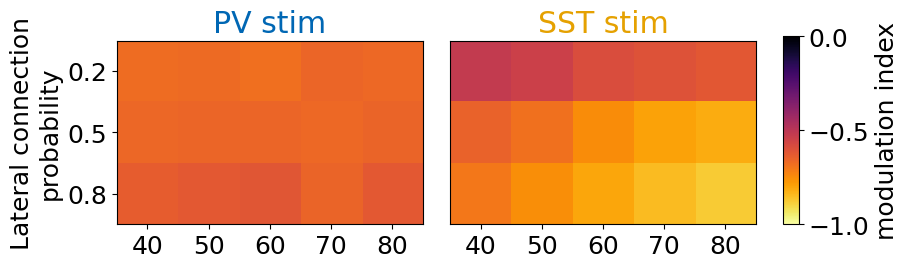

In [15]:
mat_fname = plotDataDir + f"/{distToPrint}_cmaps.mat"
mat_contents = loadmat(mat_fname)

PV_MI_medians = mat_contents['PV_MI_medians']
SST_MI_medians = mat_contents['SST_MI_medians']

alpha_list = [0.04,0.05,0.06,0.07,0.08]
pfar_list = [0.2,0.5,0.8]

gridspec = {'width_ratios': [1, 1]}

fig, ax = plt.subplots(1,2, figsize=(8,4), gridspec_kw=gridspec)

ax[0].imshow(PV_MI_medians.T, cmap='inferno_r', vmin=-1, vmax=0)
im = ax[1].imshow(SST_MI_medians.T, cmap='inferno_r', vmin=-1, vmax=0)

tic = ['%.0f'%(alpha*(10**3)) for alpha in alpha_list]

ax[0].set_yticks([0,1,2],pfar_list)
ax[1].set_title('SST stim', color=sstcolor)
ax[0].set_title('PV stim', color=pvcolor)
ax[1].set_yticks([])
ax[0].set_ylabel('Lateral connection\nprobability')
ax[0].set_xticks([0,1,2,3,4],tic)
# plt.sca(ax[1])
ax[1].set_xticks([0,1,2,3,4],tic)

# fig.text(0.55, 0.05, 'dendritic inhibition\nstrength', ha='center',fontsize=20)

cb_ax = fig.add_axes([1., 0.27, 0.02, 0.47])
cbar = fig.colorbar(im, cax=cb_ax, ticks=[0,-0.5,-1])
cbar.set_label('modulation index')

# cbar.ax.invert_yaxis()

plt.tight_layout()
plt.savefig(plotDir + f'/Fig_S12B.png',bbox_inches='tight',dpi=200)
plt.show()

In [16]:
contrasts = np.array([0.02, 0.05, 0.1, 0.18, 0.33])
ignor=1
numseeds = 10
di=0
delay = 200
binlen = 200
pi=0

dist='distal'

alpha_list = [0.04,0.05,0.06,0.07,0.08]
pfar_list = [0.2,0.5,0.8]

alpha_list_to_save = [int(x*10**3) for x in alpha_list]
cmap = {}
cmap['dend_inh_strengths'] = alpha_list_to_save

PV_MI_medians = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_medians = np.zeros((len(alpha_list),len(pfar_list)))
PV_MI_sds = np.zeros((len(alpha_list),len(pfar_list)))
SST_MI_sds = np.zeros((len(alpha_list),len(pfar_list)))


for ai in range(len(alpha_list)):
    alpha = alpha_list[ai]
    print(f'alpha = {alpha}')
    for pfi in range(len(pfar_list)):
        pfar = pfar_list[pfi]
        
        rawDataPath = plotDataDir + f'/{dist}_a%s'%alpha + '_pf%s'%pfar
        
        try: 
            os.mkdir(rawDataPath)
        except FileExistsError:
            pass
        
        print(f'\tpfar = {pfar}')
        simname = 't90_a%s'%alpha + '_pf%s'%pfar
#         print(simname)
        all_conditions = []
        slopes_cp, slopes_sp, slopes_cs, slopes_ss = [], [], [], []


        ctrl_pv_ave = np.zeros(5)
        stim_pv_ave = np.zeros(5)
        ctrl_sst_ave = np.zeros(5)
        stim_sst_ave = np.zeros(5)

        for seed in range(1,numseeds+1):
            print(f'\t\tseed {seed}')
            ctrl_pv_curve = [[] for i in range(4)]
            stim_pv_curve = [[] for i in range(4)]
            ctrl_sst_curve = [[] for i in range(4)]
            stim_sst_curve = [[] for i in range(4)]

            ctrl_pv_curve_e = [[] for i in range(4)]
            stim_pv_curve_e = [[] for i in range(4)]
            ctrl_sst_curve_e = [[] for i in range(4)]
            stim_sst_curve_e = [[] for i in range(4)]


            folder = f'{dist}_data/%s/results_%s/'%(simname, seed)
#             print(f'folder = {folder}')
            not_all_found=False
            for cont in contrasts:
                try:
                    with open(folder + 'PV_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'PV_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    print(simname, seed, 'PV', cont, 'not found.')
                    not_all_found = True
                    break

                ctrlpv_E_mean, stimpv_E_mean, ctrlpv_E_err, stimpv_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay,binlen=binlen)
                ctrlpv_P_mean, stimpv_P_mean, ctrlpv_P_err, stimpv_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen=binlen)
                ctrlpv_S_mean, stimpv_S_mean, ctrlpv_S_err, stimpv_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen=binlen)
                ctrlpv_A_mean, stimpv_A_mean, ctrlpv_A_err, stimpv_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen=binlen)

                ctrl_pv_curve[0].append(ctrlpv_E_mean)
                ctrl_pv_curve[1].append(ctrlpv_P_mean)
                ctrl_pv_curve[2].append(ctrlpv_S_mean)
                ctrl_pv_curve[3].append(ctrlpv_A_mean)
                ctrl_pv_curve_e[0].append(ctrlpv_E_err)
                ctrl_pv_curve_e[1].append(ctrlpv_P_err)
                ctrl_pv_curve_e[2].append(ctrlpv_S_err)
                ctrl_pv_curve_e[3].append(ctrlpv_A_err)

                stim_pv_curve[0].append(stimpv_E_mean)
                stim_pv_curve[1].append(stimpv_P_mean)
                stim_pv_curve[2].append(stimpv_S_mean)
                stim_pv_curve[3].append(stimpv_A_mean)
                stim_pv_curve_e[0].append(stimpv_E_err)
                stim_pv_curve_e[1].append(stimpv_P_err)
                stim_pv_curve_e[2].append(stimpv_S_err)
                stim_pv_curve_e[3].append(stimpv_A_err)


                try:
                    with open(folder + 'SST_%s_spikes.pickle'%cont, 'rb') as f:
                        all_spikes = pickle.load(f)
                    with open(folder + 'SST_%s_positions.pickle'%cont, 'rb') as f:
                        all_positions = pickle.load(f)
                except FileNotFoundError:
                    print(simname, seed, 'SST', cont, 'not found.')
                    not_all_found = True
                    break

                ctrlsst_E_mean, stimsst_E_mean, ctrlsst_E_err, stimsst_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000], delay=delay, binlen= binlen)
                ctrlsst_P_mean, stimsst_P_mean, ctrlsst_P_err, stimsst_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000], delay=delay, binlen= binlen)
                ctrlsst_S_mean, stimsst_S_mean, ctrlsst_S_err, stimsst_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000], delay=delay, binlen= binlen)
                ctrlsst_A_mean, stimsst_A_mean, ctrlsst_A_err, stimsst_A_err = getStimRateMeans(all_spikes, all_positions, delay=delay, binlen= binlen)


                ctrl_sst_curve[0].append(ctrlsst_E_mean)
                ctrl_sst_curve[1].append(ctrlsst_P_mean)
                ctrl_sst_curve[2].append(ctrlsst_S_mean)
                ctrl_sst_curve[3].append(ctrlsst_A_mean)
                ctrl_sst_curve_e[0].append(ctrlsst_E_err)
                ctrl_sst_curve_e[1].append(ctrlsst_P_err)
                ctrl_sst_curve_e[2].append(ctrlsst_S_err)
                ctrl_sst_curve_e[3].append(ctrlsst_A_err)

                stim_sst_curve[0].append(stimsst_E_mean)
                stim_sst_curve[1].append(stimsst_P_mean)
                stim_sst_curve[2].append(stimsst_S_mean)
                stim_sst_curve[3].append(stimsst_A_mean)
                stim_sst_curve_e[0].append(stimsst_E_err)
                stim_sst_curve_e[1].append(stimsst_P_err)
                stim_sst_curve_e[2].append(stimsst_S_err)
                stim_sst_curve_e[3].append(stimsst_A_err)
            # contrasts = np.array([ 0.05, 0.1, 0.2, 0.3])


                ctrl_pv_ave += ctrlpv_A_mean
                stim_pv_ave += stimpv_A_mean
                ctrl_sst_ave += ctrlsst_A_mean
                stim_sst_ave += stimsst_A_mean

            if not_all_found:
                continue



            params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_pv_curve[pi][ignor:], sigma=ctrl_pv_curve_e[pi][ignor:])
            m_cp, C_cp, n_cp, k_cp = params
            m_cp_err, C_cp_err, n_cp_err, k_cp_err = np.sqrt(np.diag(cov))
        #     slope_cp = C_cp*n_cp/k_cp/4.0
            slope_cp, _ = get_slope(m_cp, C_cp, n_cp, k_cp)
            
            condpv = True in (x == 0 for x in stim_pv_curve_e[pi][ignor:])
            condsst = True in (x == 0 for x in stim_sst_curve_e[pi][ignor:]) 

            if stim_pv_curve[pi][ignor:] == [0,0,0,0] or condpv:
                slope_sp = 0
            else:
                params, cov = fit_naka_rushton(contrasts[ignor:], stim_pv_curve[pi][ignor:], sigma=stim_pv_curve_e[pi][ignor:])
                m_sp, C_sp, n_sp, k_sp = params
                m_sp_err, C_sp_err, n_sp_err, k_sp_err = np.sqrt(np.diag(cov))
            #     slope_sp = C_sp*n_sp/k_sp/4.0
                slope_sp, _ = get_slope(m_sp, C_sp, n_sp, k_sp)
                
            

            params, cov = fit_naka_rushton(contrasts[ignor:], ctrl_sst_curve[pi][ignor:], sigma=ctrl_sst_curve_e[pi][ignor:])
            m_cs, C_cs, n_cs, k_cs = params
            m_cs_err, C_cs_err, n_cs_err, k_cs_err = np.sqrt(np.diag(cov))
            slope_cs, _ = get_slope(m_cs, C_cs, n_cs, k_cs)

            if stim_sst_curve[pi][ignor:] == [0,0,0,0] or condsst:
                slope_ss = 0
            else:
                params, cov = fit_naka_rushton(contrasts[ignor:], stim_sst_curve[pi][ignor:], sigma=stim_sst_curve_e[pi][ignor:])
                m_ss, C_ss, n_ss, k_ss = params
                m_ss_err, C_ss_err, n_ss_err, k_ss_err = np.sqrt(np.diag(cov))
                slope_ss, _ = get_slope(m_ss, C_ss, n_ss, k_ss)



            slopes_cp.append(slope_cp)
            slopes_sp.append(slope_sp)
            slopes_cs.append(slope_cs)
            slopes_ss.append(slope_ss)




        ctrl_pv_ave = ctrl_pv_ave/100.
        stim_pv_ave = stim_pv_ave/100.
        ctrl_sst_ave = ctrl_sst_ave/100.
        stim_sst_ave = stim_sst_ave/100.

        all_slopes = [slopes_cp, slopes_sp, slopes_cs, slopes_ss]


        all_conditions.append(all_slopes)
        
        di =0

        slopes_cp, slopes_sp, slopes_cs, slopes_ss = all_conditions[di]

        PV_changes = []
        for ii in range(len(slopes_cp)):
            PV_changes.append( (slopes_sp[ii]-slopes_cp[ii]) / (slopes_sp[ii]+slopes_cp[ii]) )

        SST_changes = []
        for ii in range(len(slopes_cs)):
            SST_changes.append( (slopes_ss[ii]-slopes_cs[ii]) / (slopes_ss[ii]+slopes_cs[ii])  )


        PV_median = np.median(PV_changes)
        SST_median = np.median(SST_changes)
        PV_sd = np.std(PV_changes)
        SST_sd = np.std(SST_changes)
        
        PV_MI_medians[ai][pfi] = PV_median
        SST_MI_medians[ai][pfi] = SST_median
        PV_MI_sds[ai][pfi] = PV_sd
        SST_MI_sds[ai][pfi] = SST_sd
        
        # np.save(rawDataPath + 'PV_changes.npy', PV_changes)
        # np.save(rawDataPath + 'SST_changes.npy', SST_changes)
        
cmap['PV_MI_medians'] = PV_MI_medians
cmap['SST_MI_medians'] = SST_MI_medians
cmap['PV_MI_mads'] = PV_MI_mads
cmap['SST_MI_mads'] = SST_MI_mads
savemat(plotDataDir + f"/{distToPrint}_cmaps.mat",cmap)
# np.save(plotDataDir + f'/PV_MI_medians_{dist}_{numseeds}seeds.npy', PV_MI_medians)
# np.save(plotDataDir + f'/SST_MI_medians_{dist}_{numseeds}seeds.npy', SST_MI_medians)
# np.save(plotDataDir + f'/PV_MI_sds_{dist}_{numseeds}seeds.npy', PV_MI_sds)
# np.save(plotDataDir + f'/SST_MI_sds_{dist}_{numseeds}seeds.npy', SST_MI_sds)

alpha = 0.04
	pfar = 0.2
		seed 1


/storage/home/hcoda1/8/zmobille3/.conda/envs/trainsnn/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.5
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.8
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
alpha = 0.05
	pfar = 0.2
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.5
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.8
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
alpha = 0.06
	pfar = 0.2
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.5
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
	pfar = 0.8
		seed 1
		seed 2
		seed 3
		seed 4
		seed 5
		seed 6
		seed 7
		seed 8
		seed 9
		seed 10
alpha = 0.07
	pfar = 0.2
		seed 1
		seed 2
		seed 3
		seed 4
		seed 

/scratch/1706985/ipykernel_226730/3432405321.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


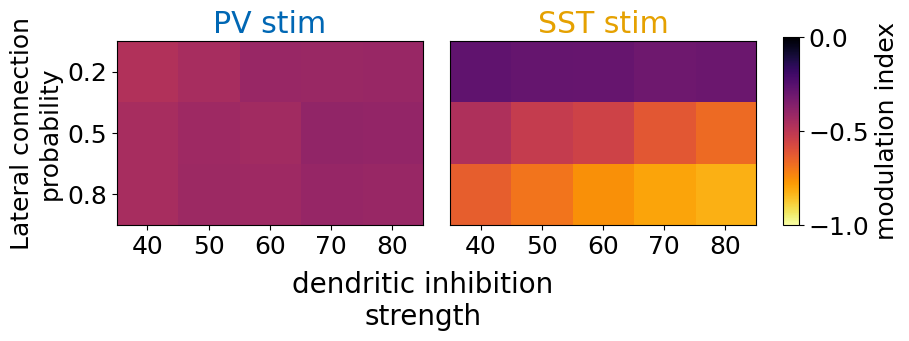

In [17]:
mat_fname = plotDataDir + f"/{distToPrint}_cmaps.mat"
mat_contents = loadmat(mat_fname)

PV_MI_medians = mat_contents['PV_MI_medians']
SST_MI_medians = mat_contents['SST_MI_medians']

alpha_list = [0.04,0.05,0.06,0.07,0.08]
pfar_list = [0.2,0.5,0.8]

gridspec = {'width_ratios': [1, 1]}

fig, ax = plt.subplots(1,2, figsize=(8,4), gridspec_kw=gridspec)

ax[0].imshow(PV_MI_medians.T, cmap='inferno_r', vmin=-1, vmax=0)
im = ax[1].imshow(SST_MI_medians.T, cmap='inferno_r', vmin=-1, vmax=0)

tic = ['%.0f'%(alpha*(10**3)) for alpha in alpha_list]

ax[0].set_yticks([0,1,2],pfar_list)
ax[1].set_title('SST stim', color=sstcolor)
ax[0].set_title('PV stim', color=pvcolor)
ax[1].set_yticks([])
ax[0].set_ylabel('Lateral connection\nprobability')
ax[0].set_xticks([0,1,2,3,4],tic)
plt.sca(ax[1])
ax[1].set_xticks([0,1,2,3,4],tic)

fig.text(0.55, 0.02, 'dendritic inhibition\nstrength', ha='center',fontsize=20)

cb_ax = fig.add_axes([1., 0.27, 0.02, 0.47])
cbar = fig.colorbar(im, cax=cb_ax, ticks=[0,-0.5,-1])
cbar.set_label('modulation index')

# cbar.ax.invert_yaxis()

plt.tight_layout()
plt.savefig(plotDir + f'/Fig_S12C.png',bbox_inches='tight',dpi=200)
plt.show()